In [701]:
from src import analysis_utils as utils
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns; sns.set()
import pandas as pd
import scipy.stats as sci
from matplotlib.patches import Rectangle

%matplotlib inline 
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [634]:
expt21_df=utils.readSimData("data/expt21_47tRNAEfTu_7ribosome_8tRNASynth_0aa_85nmSidelength_20180501.xls")
#expt21_df_incorr = utils.countIncorrectRibosomeCollisions(expt21_df,np.arange(8,12),np.arange(1,2));
expt21_df_incorr_rib1 = utils.countIncorrectRibosomeCollisions(expt21_df,np.arange(8,12),np.arange(2,3));
#expt21_df_incorr_norepeats = utils.countIncorrectRibosomeCollisions(expt21_df,np.arange(8,12),np.arange(1,2));

expt22_df=utils.readSimData("data/expt22_84tRNAEfTu_13ribosome_15tRNASynth_0aa_85nmSidelength_20180501.xls")
#expt22_df_incorr_47= utils.countIncorrectRibosomeCollisions(expt22_df,np.arange(1,5),np.arange(85,86), tRNAInclusionList=np.arange(1,47));

expt23_df=utils.readSimData("data/expt23_121tRNAEfTu_19ribosome_22tRNASynth_0aa_85nmSidelength_20180501.xls")
#expt23_df_incorr_47 = utils.countIncorrectRibosomeCollisions(expt23_df,np.arange(1,5),np.arange(122,123), tRNAInclusionList=np.arange(1,47));

expt24_df=utils.readSimData("data/expt24_158tRNAEfTu_24ribosome_28tRNASynth_0aa_85nmSidelength_20180501.xls")
#expt24_df_incorr_47 = utils.countIncorrectRibosomeCollisions(expt24_df,np.arange(1,5),np.arange(159,160), tRNAInclusionList=np.arange(1,47));

expt25_df=utils.readSimData("data/expt25_195tRNAEfTu_30ribosome_34tRNASynth_0aa_85nmSidelength_20180501.xls")
#expt25_df_incorr_47 = utils.countIncorrectRibosomeCollisions(expt25_df,np.arange(1,5),np.arange(196,197), tRNAInclusionList=np.arange(1,47));

expt26_df=utils.readSimData("data/expt26_195tRNAEfTu_30ribosome_34tRNASynth_0aa_85nmSidelength_20180501.xls")
#expt26_df_incorr_47 = utils.countIncorrectRibosomeCollisions(expt26_df,np.arange(1,5),np.arange(196,197), tRNAInclusionList=np.arange(1,47));

Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)


In [4]:
expt21_df_coll = utils.countRibosomeCollisions(expt21_df, np.arange(8,54),np.arange(1,2))
expt22_df_coll = utils.countRibosomeCollisions(expt22_df, np.arange(1,47),np.arange(85,86))
expt23_df_coll = utils.countRibosomeCollisions(expt23_df, np.arange(1,47),np.arange(122,123))
expt24_df_coll = utils.countRibosomeCollisions(expt24_df, np.arange(1,47), np.arange(159,160))
expt25_df_coll = utils.countRibosomeCollisions(expt25_df, np.arange(1,47), np.arange(196,197))
expt26_df_coll = utils.countRibosomeCollisions(expt26_df, np.arange(1,47), np.arange(196,197))

Computing tRNA collision count [rib,tRNA]: (1, 46)
Computing tRNA collision count [rib,tRNA]: (1, 46)
Computing tRNA collision count [rib,tRNA]: (1, 46)
Computing tRNA collision count [rib,tRNA]: (1, 46)
Computing tRNA collision count [rib,tRNA]: (1, 46)
Computing tRNA collision count [rib,tRNA]: (1, 46)


In [442]:
#Algorithm to test distribution of # of incorrect samples for independent 47 sided dice with each side uniform probability (# of incorrect rolls per 1 correct roll)

incorrectRollsArr = list()
for i in range(5000000):
    incorrectCounter = 0;
    roll = np.random.randint(0,47)
    while(roll!=9): #42 is the arbitrarily picked "correct" tRNA
        roll = np.random.randint(0,47)
        incorrectCounter+=1;
    incorrectRollsArr.append(incorrectCounter)

32.0
46.026202


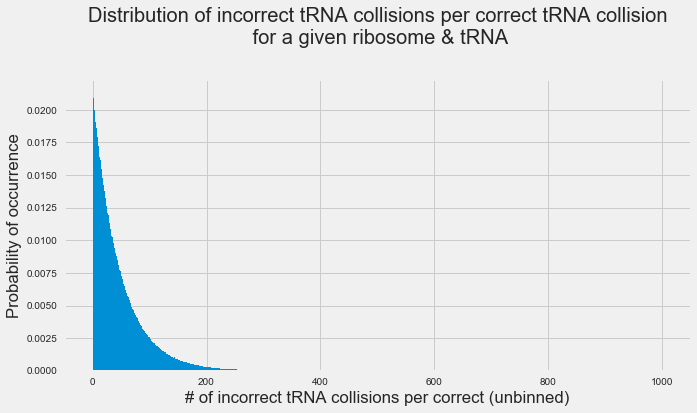

In [641]:
fig, ax = plt.subplots(figsize=(10,5))

plt.hist(incorrectRollsArr,bins=1000,range=(0,1000),normed=1);
ax.set_title("Distribution of incorrect tRNA collisions per correct tRNA collision\n for a given ribosome & tRNA", y=1.1)
ax.set_xlabel("# of incorrect tRNA collisions per correct (unbinned)")
ax.set_ylabel("Probability of occurrence")
print(np.median(incorrectRollsArr))
print(np.mean(incorrectRollsArr))

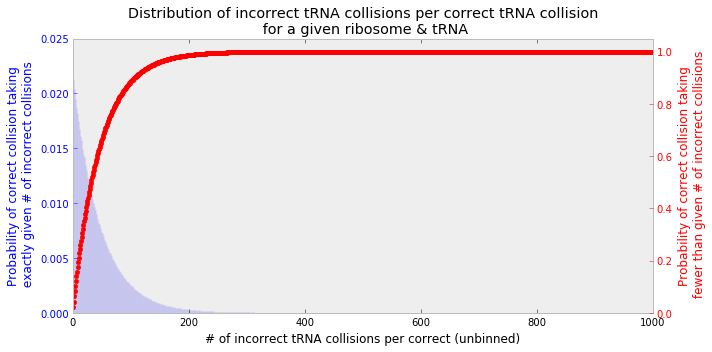

In [797]:
plt.style.use('seaborn-colorblind')
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(10,5))
a=np.histogram(incorrectRollsArr,bins=np.arange(0,1001),normed=1);
ax1.bar(a[1][:-1],a[0],color='b',width=1,alpha=0.2)
ax1.set_ylabel('Probability of correct collision taking\n exactly given # of incorrect collisions', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(0,0.025)
ax1.set_xlim(0,1000)
#ax1.fill_between(a[1][:-1],a[0],alpha=0.4)
ax1.grid(False)
plt.title("Distribution of incorrect tRNA collisions per correct tRNA collision\n for a given ribosome & tRNA")
plt.xlabel("# of incorrect tRNA collisions per correct (unbinned)")

cum = np.cumsum(a[0])
ax2 = ax1.twinx()
ax2.scatter(a[1][:-1],cum,color='r')
ax2.set_ylabel('Probability of correct collision taking\n fewer than given # of incorrect collisions', color='r')
ax2.tick_params('y', colors='r')
ax2.set_ylim(0,1.05)
ax2.set_xlim(0,1000)

ax2.grid(False)


fig.tight_layout()

32.0
46.026202


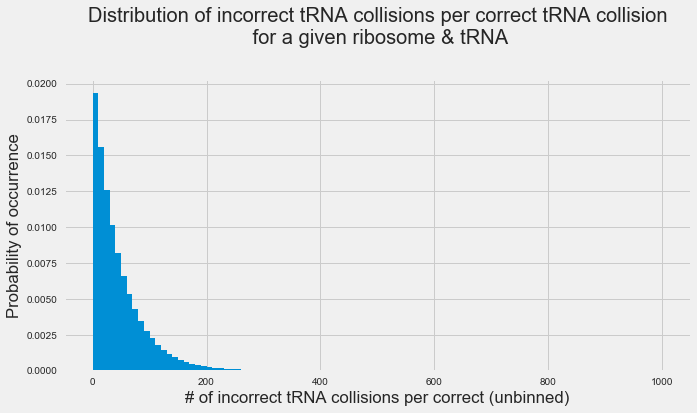

In [548]:
fig, ax = plt.subplots(figsize=(10,5))

plt.hist(incorrectRollsArr,bins=100,range=(0,1000),normed=1);
ax.set_title("Distribution of incorrect tRNA collisions per correct tRNA collision\n for a given ribosome & tRNA", y=1.1)
ax.set_xlabel("# of incorrect tRNA collisions per correct (unbinned)")
ax.set_ylabel("Probability of occurrence")
print(np.median(incorrectRollsArr))
print(np.mean(incorrectRollsArr))

In [ ]:
Including repeats

0.0
49.4773946026
5734.25
495.0


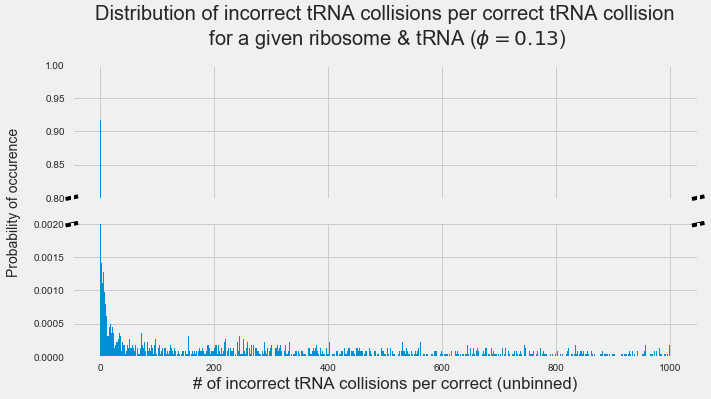

In [635]:
plt.style.use('fivethirtyeight')

df_list_47 = [expt21_df_incorr]
df_name = ["13% volume fraction"]

fig,(ax,ax2)=plt.subplots(2,1,sharex=True,figsize=(10,5))
test=list(df_list_47[0][0][0]+df_list_47[0][0][1]+df_list_47[0][0][2]+df_list_47[0][0][3])
ax.hist(test,bins=1000,range=(0,1000),normed=1)#,label=["tRNA 1","tRNA 2","tRNA 3","tRNA 4"])
ax2.hist(test,bins=1000,range=(0,1000),normed=1)#,label=["tRNA 1","tRNA 2","tRNA 3","tRNA 4"])

ax.set_ylim([0.8,1])
ax2.set_ylim([0,0.002])
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')
ax2.xaxis.tick_bottom()
#fig.add_subplot(111, frameon=False)
#ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
#plt.grid(False)
d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

fig.text(0, 0.5, "Probability of occurence", ha='center', va='center', rotation='vertical')
ax.set_title('Distribution of incorrect tRNA collisions per correct tRNA collision\n for a given ribosome & tRNA '+'($\phi = 0.13$)', y=1.1)
ax2.set_xlabel("# of incorrect tRNA collisions per correct (unbinned)")
print(np.median(test))
print(np.mean(test))
print(len(test)/4)
print(sum(i>8 for i in test)/4)


In [ ]:
df_list_47 = [expt21_df_incorr]
df_name = ["13% volume fraction"]

plt.style.use('seaborn-colorblind')
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(10,5))
a=np.histogram(incorrectRollsArr,bins=np.arange(0,1001),normed=1);
ax1.bar(a[1][:-1],a[0],color='b',width=1,alpha=0.2)
ax1.set_ylabel('Probability of correct collision taking\n exactly given # of incorrect collisions', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(0,0.025)
ax1.set_xlim(0,1000)
#ax1.fill_between(a[1][:-1],a[0],alpha=0.4)
ax1.grid(False)
plt.title("Distribution of incorrect tRNA collisions per correct tRNA collision\n for a given ribosome & tRNA")
plt.xlabel("# of incorrect tRNA collisions per correct (unbinned)")

cum = np.cumsum(a[0])
ax2 = ax1.twinx()
ax2.scatter(a[1][:-1],cum,color='r')
ax2.set_ylabel('Probability of correct collision taking\n fewer than given # of incorrect collisions', color='r')
ax2.tick_params('y', colors='r')
ax2.set_ylim(0,1.05)
ax2.set_xlim(0,1000)

ax2.grid(False)


fig.tight_layout()

27.0
45.0793335978
630.25
446.25


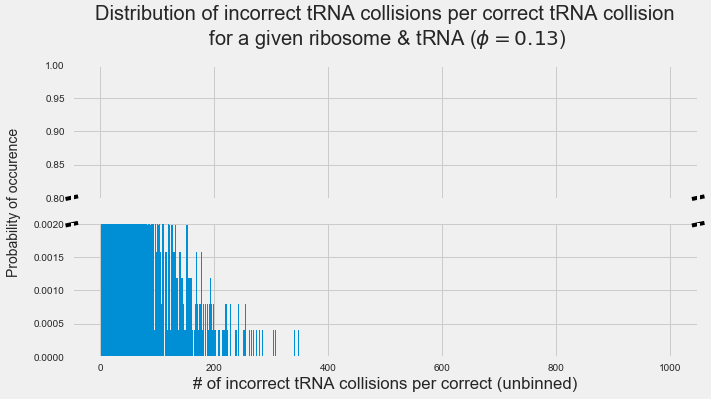

In [636]:
plt.style.use('fivethirtyeight')
df_list_47 = [expt21_df_incorr_rib1]
df_name = ["13% volume fraction"]

fig,(ax,ax2)=plt.subplots(2,1,sharex=True,figsize=(10,5))
test=list(df_list_47[0][0][0]+df_list_47[0][0][1]+df_list_47[0][0][2]+df_list_47[0][0][3])
ax.hist(test,bins=1000,range=(0,1000),normed=1)#,label=["tRNA 1","tRNA 2","tRNA 3","tRNA 4"])
ax2.hist(test,bins=1000,range=(0,1000),normed=1)#,label=["tRNA 1","tRNA 2","tRNA 3","tRNA 4"])

ax.set_ylim([0.8,1])
ax2.set_ylim([0,0.002])
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')
ax2.xaxis.tick_bottom()
#fig.add_subplot(111, frameon=False)
#ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
#plt.grid(False)
d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

fig.text(0, 0.5, "Probability of occurence", ha='center', va='center', rotation='vertical')
ax.set_title('Distribution of incorrect tRNA collisions per correct tRNA collision\n for a given ribosome & tRNA '+'($\phi = 0.13$)', y=1.1)
ax2.set_xlabel("# of incorrect tRNA collisions per correct (unbinned)")
print(np.median(test))
print(np.mean(test))
print(len(test)/4)
print(sum(i>8 for i in test)/4)


In [629]:
df_list_47 = [expt21_df_incorr]

inseq=False;
seq_count=0;
seq_len=0;
seq_len_list=list()
for i in range(len(df_list_47[0][0][0])):
    if(df_list_47[0][0][0][i]==0 and inseq==False):
        inseq=True;
        seq_count+=1
        seq_len+=1
    elif (df_list_47[0][0][0][i]==0 and df_list_47[0][0][0][i-1]==0 and inseq==True):
        seq_len+=1
    elif (df_list_47[0][0][0][i]!=df_list_47[0][0][0][i-1] and inseq==True):
        inseq=False;
        seq_len_list.append(seq_len)
        seq_len=0
    if(df_list_47[0][0][0][i]!=0 and df_list_47[0][0][0][i+1]!=0):
        seq_len_list.append(0)
        

print(len(df_list_47[0][0][0]))
print(seq_len_list)
print(len(seq_len_list))
print(np.average(seq_len_list))
print(sum(df_list_47[0][0][0]))

5847
[5, 0, 7, 23, 7, 0, 13, 15, 5, 0, 19, 25, 7, 0, 14, 15, 9, 5, 1, 5, 6, 16, 8, 0, 11, 21, 5, 0, 18, 6, 14, 6, 8, 5, 17, 0, 12, 12, 7, 5, 1, 16, 3, 14, 16, 3, 1, 32, 39, 38, 0, 11, 6, 4, 2, 2, 2, 4, 55, 3, 9, 8, 1, 6, 6, 9, 24, 5, 6, 4, 6, 2, 10, 3, 17, 9, 5, 5, 1, 34, 2, 14, 1, 2, 13, 28, 10, 20, 0, 20, 5, 9, 23, 1, 6, 36, 8, 13, 1, 32, 6, 26, 0, 1, 1, 50, 18, 0, 1, 24, 0, 6, 8, 5, 1, 23, 0, 16, 17, 20, 22, 4, 1, 13, 14, 1, 4, 10, 9, 12, 4, 0, 0, 11, 1, 11, 1, 0, 30, 31, 1, 5, 2, 0, 6, 1, 20, 9, 1, 7, 9, 3, 2, 6, 3, 3, 2, 6, 6, 18, 26, 57, 16, 0, 19, 12, 13, 11, 18, 4, 3, 17, 12, 1, 12, 2, 2, 5, 3, 30, 5, 17, 3, 4, 16, 12, 6, 8, 10, 1, 11, 0, 0, 4, 2, 0, 6, 4, 1, 2, 6, 12, 8, 1, 5, 14, 25, 6, 23, 2, 8, 0, 4, 1, 4, 9, 56, 8, 1, 3, 22, 10, 3, 9, 6, 10, 15, 2, 18, 2, 14, 3, 14, 17, 6, 7, 18, 1, 24, 5, 3, 14, 16, 9, 21, 3, 5, 6, 1, 72, 7, 18, 5, 0, 13, 39, 41, 0, 0, 3, 4, 9, 2, 34, 14, 5, 16, 2, 4, 5, 2, 3, 3, 1, 3, 1, 6, 1, 1, 0, 7, 16, 0, 5, 9, 3, 0, 3, 28, 1, 0, 2, 4, 16, 8, 11, 0, 

In [607]:
df_list_47[0][0][0]

[885.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 187.0,
 233.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 181.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2075.0,
 95.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 491.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 331.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 43.0,
 548.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 322.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 112.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 233.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 101.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

In [ ]:
Not including repeats

31.0
49.1711833785
457.75


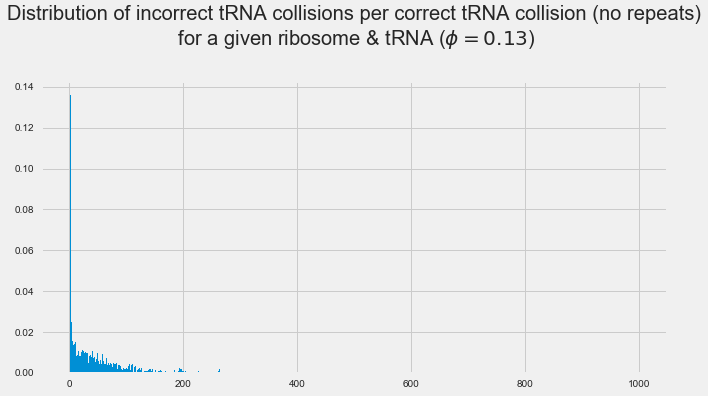

In [584]:
plt.style.use('fivethirtyeight')

df_list_47 = [expt21_df_incorr_norepeats]
df_name = ["13% volume fraction"]

fig,ax=plt.subplots(1,1,sharex=True,figsize=(10,5))
test=list(df_list_47[0][0][0]+df_list_47[0][0][1]+df_list_47[0][0][2]+df_list_47[0][0][3])
ax.hist(test,bins=1000,range=(0,1000),normed=1)#,label=["tRNA 1","tRNA 2","tRNA 3","tRNA 4"])

ax.set_title('Distribution of incorrect tRNA collisions per correct tRNA collision (no repeats)\n for a given ribosome & tRNA '+'($\phi = 0.13$)', y=1.1)
ax2.set_xlabel("# of incorrect tRNA collisions per correct (unbinned)")
print(np.median(test))
print(np.mean(test))
len(df_list_47[0][0][0])
print(sum(i>=3 for i in test)/4)

[100.0,
 10.0,
 14.0,
 15.0,
 2.0,
 209.0,
 14.0,
 52.0,
 31.0,
 6.0,
 52.0,
 28.0,
 11.0,
 14.0,
 1.0,
 8.0,
 34.0,
 7.0,
 111.0,
 3.0,
 74.0,
 39.0,
 101.0,
 1.0,
 3.0,
 42.0,
 11.0,
 1.0,
 29.0,
 145.0,
 110.0,
 72.0,
 83.0,
 17.0,
 76.0,
 219.0,
 20.0,
 62.0,
 46.0,
 1.0,
 1.0,
 30.0,
 1.0,
 39.0,
 9.0,
 10.0,
 1.0,
 46.0,
 1.0,
 81.0,
 143.0,
 28.0,
 105.0,
 144.0,
 39.0,
 46.0,
 82.0,
 86.0,
 43.0,
 136.0,
 25.0,
 106.0,
 71.0,
 46.0,
 18.0,
 196.0,
 34.0,
 106.0,
 1.0,
 116.0,
 13.0,
 53.0,
 1.0,
 15.0,
 38.0,
 122.0,
 33.0,
 93.0,
 2.0,
 123.0,
 3.0,
 24.0,
 36.0,
 198.0,
 55.0,
 90.0,
 223.0,
 16.0,
 95.0,
 35.0,
 1.0,
 83.0,
 1.0,
 1.0,
 80.0,
 1.0,
 19.0,
 1.0,
 21.0,
 52.0,
 41.0,
 24.0,
 44.0,
 37.0,
 23.0,
 1.0,
 76.0,
 16.0,
 1.0,
 1.0,
 64.0,
 12.0,
 2.0,
 58.0,
 23.0,
 8.0,
 44.0,
 24.0,
 43.0,
 63.0,
 73.0,
 80.0,
 40.0,
 1.0,
 21.0,
 1.0,
 44.0,
 118.0,
 2.0,
 1.0,
 34.0,
 25.0,
 58.0,
 110.0,
 106.0,
 22.0,
 5.0,
 4.0,
 13.0,
 32.0,
 30.0,
 1.0,
 24.0,
 65.0,
 1.0,


In [ ]:
expt21_df_split = utils.timeSplitter(expt21_df, scale="log")
fig,ax=plt.subplots(1,1,sharex=True,figsize=(10,5))
test=list(df_list_47[0][0][0]+df_list_47[0][0][1]+df_list_47[0][0][2]+df_list_47[0][0][3])
ax.hist(test,bins=1000,range=(0,1000),normed=1)#,label=["tRNA 1","tRNA 2","tRNA 3","tRNA 4"])


([<matplotlib.axis.XTick at 0x1339b5c50>,
 <a list of 6 Text xticklabel objects>)

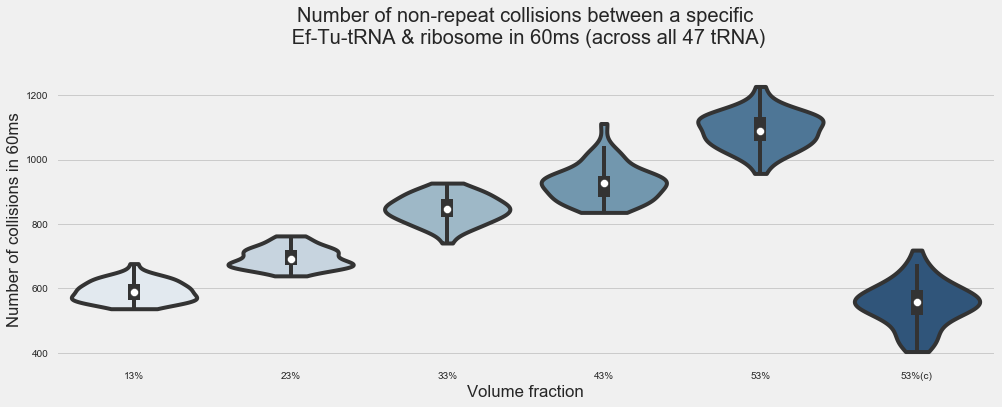

In [220]:
plt.style.use('fivethirtyeight')

df_list_collisions = [expt21_df_coll,expt22_df_coll,expt23_df_coll, expt24_df_coll, expt25_df_coll, expt26_df_coll]
x_range=np.arange(1,7)
#plt.violinplot(df_list_collisions,x_range);
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax=sns.violinplot(data=df_list_collisions,cut=0,saturation=0.5,scale="count",palette="Blues")


ax.set_xticks(np.arange(0,6),["13","23","33","43","53","53c"])
ax.set_title("Number of non-repeat collisions between a specific\n Ef-Tu-tRNA & ribosome in 60ms (across all 47 tRNA)", y=1.08)
ax.set_ylabel("Number of collisions in 60ms")
ax.set_xlabel("Volume fraction")
#ax.set_ylim([0,1300])
plt.xticks(np.arange(0,6),["13%","23%","33%","43%","53%","53%(c)"])

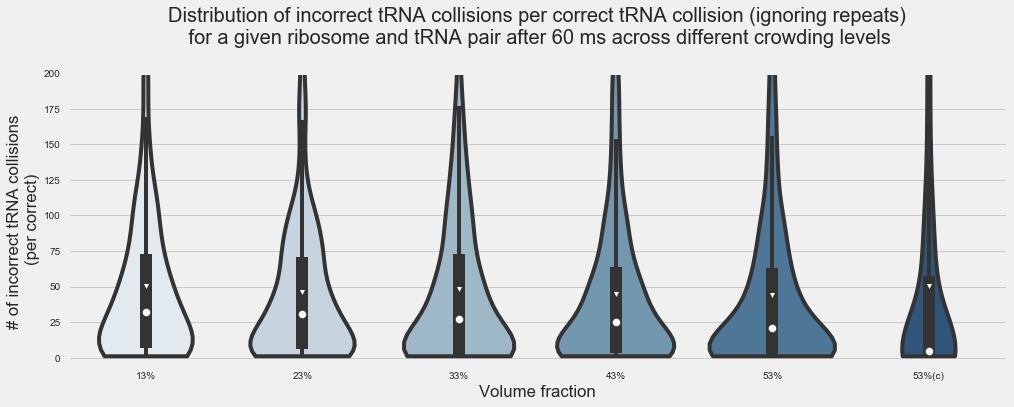

In [222]:
fig, ax = plt.subplots(figsize=(15,5))

# Seaborn violin plot
plt.scatter(x=np.arange(0,6),y=np.array([np.average(tRNA) for tRNA in df_distributions]),color='b',zorder=1)

ax=sns.violinplot(data=df_distributions,cut=0,saturation=0.5,scale="count",palette="Blues")

ax.set_ylim(0,100)

plt.xticks(np.arange(0,6),["13%","23%","33%","43%","53%","53%(c)"])
ax.set_ylim([-5,200])
ax.set_title("Distribution of incorrect tRNA collisions per correct tRNA collision (ignoring repeats)\n for a given ribosome and tRNA pair after 60 ms across different crowding levels", y=1.08,fontsize=fs)
ax.set_xlabel("Volume fraction")
ax.set_ylabel("# of incorrect tRNA collisions \n(per correct)")
ax.plot()

avg_arr=np.array([np.average(tRNA) for tRNA in df_distributions])
df = pd.DataFrame({"13%":avg_arr[0],"23%":avg_arr[1],"33%":avg_arr[2],"43%":avg_arr[3],"53%":avg_arr[4],"53%(c)":[avg_arr[0]]})
sns.stripplot(data=df,color="white",marker='v');

In [24]:
def disparity(col):
    low=0
    high=0
    for i in range(len(col)):
        if col[i]<10:
            low+=1
        if col[i]>700:
            high+=1
    return low, high

In [ ]:
df_list_collisions = [expt21_df_coll,expt22_df_coll,expt23_df_coll, expt24_df_coll, expt25_df_coll]
meanCollisions=(list(),list())
for i, df_i in enumerate(df_list_collisions):
    meanCollisions[0].append(np.mean(df_i))
    meanCollisions[1].append(np.std(df_i))
plt.errorbar(x_range,meanCollisions[0],yerr=meanCollisions[1])

In [ ]:
df_list = [expt21_df_incorr,expt22_df_incorr,expt23_df_incorr,expt24_df_incorr, expt25_df_incorr]
df_list_47 = [expt21_df_incorr,expt22_df_incorr_47,expt23_df_incorr_47,expt24_df_incorr_47, expt25_df_incorr_47]
df_name = ["21","22","23","24","25"]
df_averages=list();
df_averages47=list();

fig,ax=plt.subplots(2,5,figsize=(20,10))
for i,df_i in enumerate(df_list_47):
    ax[0,i].hist(df_i[0],bins=10,range=(1,500))
    ax[0,i].set_ylim([0,250])
   # ax[i,0].hist(df_i[0][0],bins=np.logspace(0,np.log10(20000),5),range=(1,20),log=False)
  #  ax[i,0].set_xscale("log")
for i,expt in enumerate(df_list_47):
    print(df_name[i], "mean47", np.average(expt[0][0]))
    df_averages47.append(np.average(expt[0][0]))

In [ ]:
plt.style.use('fivethirtyeight')

df_list_collisions = [expt21_df_coll,expt22_df_coll,expt23_df_coll, expt24_df_coll, expt25_df_coll, expt26_df_coll]
x_range=np.arange(1,7)
#plt.violinplot(df_list_collisions,x_range);
fig,ax=plt.subplots(1,1,figsize=(10,5))
medianlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

ax.boxplot(df_list_collisions,medianprops=medianlineprops);
ax.set_xticks(np.arange(1,7),["13","23","33","43","53","53c"])
ax.set_title("Number of non-repeat collisions between \na specific Ef-Tu-tRNA & ribosome in 60ms", y=1.08)
ax.set_ylabel("Number of collisions in 60ms")
ax.set_xlabel("Volume fraction")
#ax.set_ylim([0,1300])
plt.xticks(np.arange(1,7),["13%","23%","33%","43%","53%","53%(c)"])

In [240]:
df_list_47 = [expt21_df_incorr,expt22_df_incorr_47,expt23_df_incorr_47,expt24_df_incorr_47, expt25_df_incorr_47,expt26_df_incorr_47]
df_name = ["13% volume fraction","23% volume fraction","33% volume fraction","43% volume fraction","53% volume fraction","53% volume fraction (closed)"]

fig,ax=plt.subplots(1,6,figsize=(20,5))
for i,df_i in enumerate(df_list_47):
    ax[i].hist(df_i[0],bins=10,range=(1,500),label=["tRNA 1","tRNA 2","tRNA 3","tRNA 4"])
    ax[i].set_title(df_name[i])
    ax[i].set_ylim([0,550])
    
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)

plt.title("Distribution of incorrect tRNA collisions per correct tRNA collision (ignoring repeats)\n for a given ribosome and set of 47 tRNAs across different crowding levels", y=1.1)
plt.xlabel("# of incorrect tRNA collisions with a given ribosome before correct collision (binned)")
plt.ylabel("# of occurrences")
ax[0].legend()


['seaborn-colorblind',
 'seaborn-whitegrid',
 'seaborn-pastel',
 'seaborn-darkgrid',
 'seaborn-dark-palette',
 'seaborn-talk',
 'seaborn-notebook',
 'seaborn',
 'dark_background',
 'seaborn-ticks',
 'seaborn-bright',
 'bmh',
 'seaborn-deep',
 'classic',
 'seaborn-white',
 'ggplot',
 'seaborn-poster',
 'seaborn-dark',
 'seaborn-paper',
 'fivethirtyeight',
 'seaborn-muted',
 'grayscale']